In [1]:
import pandas as pd
import seaborn as sns # for data visualization
import matplotlib.pyplot as plt
import numpy as np
def corr_heatmap(data):
    corr_matrix = data.corr()
    mask = np.zeros_like(corr_matrix, dtype=bool)
    mask[np.triu_indices_from(mask)]= True
    f, ax = plt.subplots(figsize=(11, 15)) 
    heatmap = sns.heatmap(corr_matrix, 
                          mask = mask,
                          square = True,
                          linewidths = .5,
                          cmap = 'coolwarm',
                          cbar_kws = {'shrink': .4, 
                                    'ticks' : [-1, -.5, 0, 0.5, 1]},
                          vmin = -1, 
                          vmax = 1,
                          annot = True,
                          annot_kws = {'size': 12})#add the column names as labels
    ax.set_yticklabels(corr_matrix.columns, rotation = 0)
    ax.set_xticklabels(corr_matrix.columns)
    sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

In [2]:
df = pd.read_csv("../input/ultimate-spotify-tracks-db/SpotifyFeatures.csv")
display(df.head())

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


In [3]:
# Prints the names of the features
print(df.keys())

Index(['genre', 'artist_name', 'track_name', 'track_id', 'popularity',
       'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence'],
      dtype='object')


In [4]:
# Let's check for null values
print(pd.isnull(df).sum())

genre               0
artist_name         0
track_name          0
track_id            0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
dtype: int64


Text(0.5, 1.0, 'Time Signature Distribution')

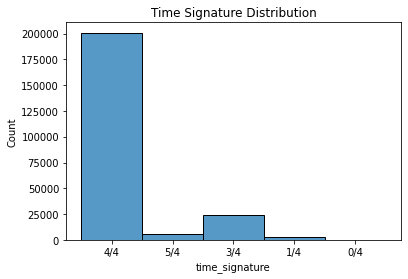

In [5]:
# There are no null values, thus there's no need to perform any kind of operation
# in order to handle the missing values
sns.histplot(df['time_signature']).set_title('Time Signature Distribution')

Tracks with a 0/4 time signature: 8


Text(0.5, 1.0, 'Time Signature Distribution')

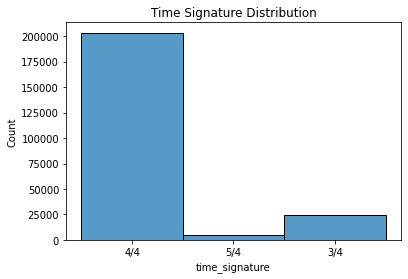

In [6]:
# The samples in the dataframe where the field 'time_signature' is '1/4'
# actually represent songs with mostly a 4/4 time signature, since it is
# most likely an error by who created the dataframe we're going to change it
# to the '4/4' value
df['time_signature'] = df['time_signature'].replace(['1/4'],'4/4')

print("Tracks with a 0/4 time signature: %s" % len(df[df['time_signature'] == '0/4']));
# Since there are just 8 samples with a '0/4' time signature,
# and since it is clearly an error, I'm going to simply delete them
df = df[df['time_signature'] != '0/4']

sns.histplot(df['time_signature']).set_title('Time Signature Distribution')

Text(0.5, 1.0, 'Genre Distribution')

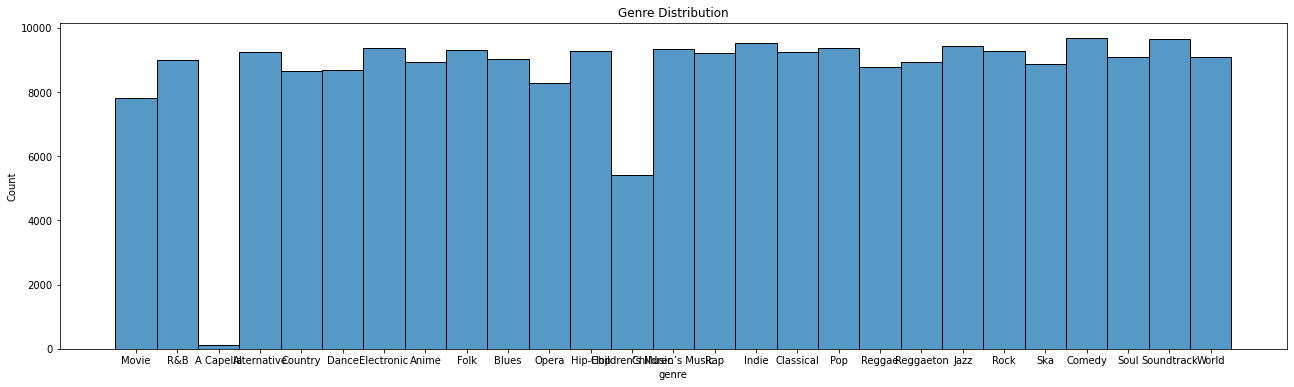

In [7]:
plt.figure(figsize=(22, 6))
sns.histplot(df['genre']).set_title('Genre Distribution')

Classical Tracks number: 9256
Pop Tracks number: 9385
Folk Tracks number: 9299
Total Tracks number: 27940


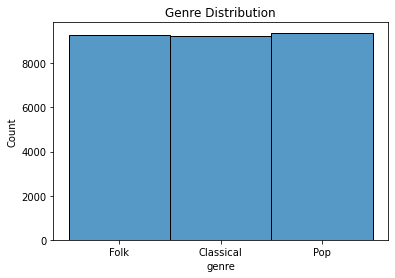

In [8]:
# i'm going to pick the three genres of the Philip Tagg's axiomatic triangle:
# Classical, Pop and Folk, as we can see they are pretty balanced

taggGenres = ['Classical','Pop','Folk']
df = df[df.genre.isin(taggGenres)];
sns.histplot(df['genre']).set_title('Genre Distribution')

print("Classical Tracks number: %s" % len(df[df['genre'] == 'Classical']));
print("Pop Tracks number: %s" % len(df[df['genre'] == 'Pop']));
print("Folk Tracks number: %s" % len(df[df['genre'] == 'Folk']));

print("Total Tracks number: %s" % len(df));

Text(0.5, 1.0, 'Key usage for every genre')

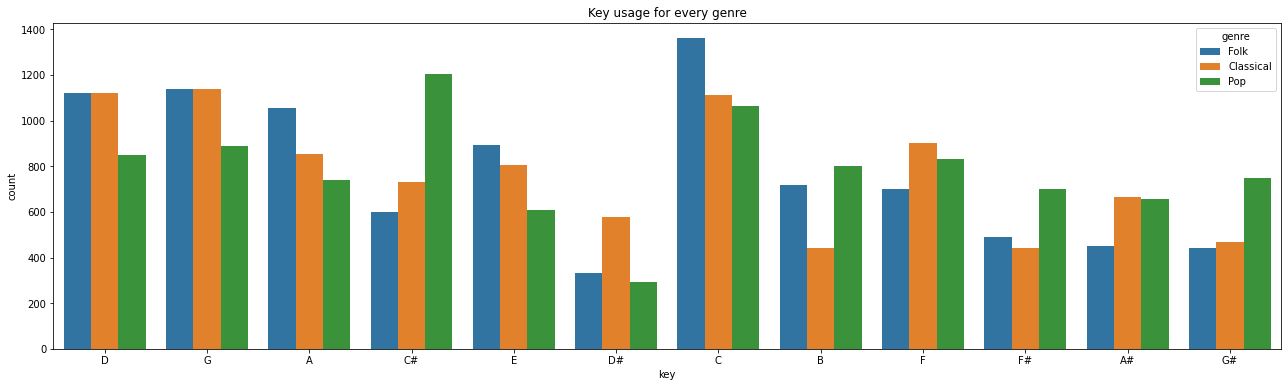

In [9]:
plt.figure(figsize=(22, 6))
sns.countplot(x = 'key', hue = 'genre', data = df)
plt.title('Key usage for every genre')
# This is the distribution of key usage for every genre, I decided at the end to drop this an the mode
# features since they don't have much meaning in a genre prediction

In [10]:
new_df = df.drop(['artist_name','track_name','track_id','popularity','key','mode','duration_ms'],axis = 1)
new_df.time_signature = new_df.time_signature.map( {'3/4':3 , '4/4':4, '5/4':5} )
new_df = pd.get_dummies(data= new_df, columns=['time_signature'])
from sklearn.utils import shuffle
new_df = shuffle(new_df)
display(new_df.head())

,genre,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,time_signature_3,time_signature_4,time_signature_5
151736,Pop,0.04800,0.6340,0.92700,0.6870,0.0864,-3.282,0.1360,128.016,0.3500,0,1,0
61982,Folk,0.92000,0.3530,0.18500,0.0244,0.1060,-12.557,0.0388,118.467,0.1750,0,1,0
128418,Classical,0.91600,0.0993,0.07630,0.9370,0.3800,-27.210,0.0426,88.985,0.0670,0,1,0
151836,Pop,0.00499,0.6680,0.50800,0.0000,0.3180,-7.502,0.3560,160.225,0.3710,0,1,0
123429,Classical,0.98400,0.2370,0.00581,0.6330,0.1070,-24.167,0.0437,76.559,0.0669,0,1,0


In [11]:
features = new_df.keys().drop(['genre']);
display(features)

Index(['acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'speechiness', 'tempo', 'valence',
       'time_signature_3', 'time_signature_4', 'time_signature_5'],
      dtype='object')

In [12]:
new_df.genre = new_df.genre.map( {'Classical':0 , 'Pop':1, 'Folk':2} )
training = new_df.sample(frac = 0.8,random_state = 420)
X_train = training[features]
y_train = training['genre']
X_test = new_df.drop(training.index)[features]
y_test = new_df.drop(training.index)['genre']
display(X_train.head())
display(y_train.head())

,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,time_signature_3,time_signature_4,time_signature_5
112624,0.512,0.689,0.860,0.000003,0.138,-3.063,0.0528,116.492,0.879,1,0,0
61929,0.220,0.384,0.949,0.000000,0.736,-3.688,0.0960,136.764,0.547,0,1,0
111564,0.281,0.754,0.823,0.000000,0.107,-5.502,0.2200,125.932,0.548,0,1,0
124429,0.948,0.265,0.270,0.126000,0.148,-13.995,0.0371,73.309,0.278,1,0,0
152011,0.466,0.653,0.425,0.000000,0.273,-6.253,0.0264,101.795,0.484,1,0,0


112624    1
61929     2
111564    1
124429    0
152011    1
Name: genre, dtype: int64

In [13]:
from sklearn.preprocessing import MinMaxScaler
pd.options.mode.chained_assignment = None  # default='warn'
scaler = MinMaxScaler()
# Loudness goes from -60 to 0 db, I will convert it to a positive value before normalizing it 
X_train['loudness'] *= -1
X_train = pd.DataFrame(scaler.fit_transform(X_train), index=X_train.index, columns=X_train.columns)
display(X_train.head())
X_test['loudness'] *= -1
X_test = pd.DataFrame(scaler.fit_transform(X_test), index=X_test.index, columns=X_test.columns)
display(X_test.head())

,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,time_signature_3,time_signature_4,time_signature_5
112624,0.514056,0.690518,0.861721,0.000003,0.124504,0.076915,0.033160,0.406158,0.886983,1.0,0.0,0.0
61929,0.220883,0.355795,0.950901,0.000000,0.733279,0.089918,0.079974,0.506222,0.551968,0.0,1.0,0.0
111564,0.282128,0.761853,0.824646,0.000000,0.092945,0.127658,0.214348,0.452755,0.552977,0.0,1.0,0.0
124429,0.951807,0.225198,0.270526,0.126761,0.134684,0.304352,0.016147,0.193005,0.280525,1.0,0.0,0.0
152011,0.467871,0.651010,0.425840,0.000000,0.261936,0.143282,0.004551,0.333613,0.488396,1.0,0.0,0.0


,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,time_signature_3,time_signature_4,time_signature_5
151736,0.048191,0.633583,0.934437,0.695344,0.064153,0.080636,0.165934,0.529637,0.358607,0.0,1.0,0.0
124893,0.994980,0.152729,0.052558,0.956478,0.050302,0.527218,0.029903,0.273005,0.039549,0.0,1.0,0.0
65404,0.482931,0.729313,0.361513,0.000242,0.068527,0.199672,0.011287,0.404329,0.339139,0.0,1.0,0.0
123816,0.870482,0.090009,0.159779,0.928138,0.382420,0.382748,0.025359,0.610498,0.033914,1.0,0.0,0.0
43917,0.850401,0.513644,0.559212,0.000173,0.056967,0.193843,0.031076,0.751475,0.588115,0.0,1.0,0.0


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer, accuracy_score, roc_auc_score 
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size = 0.2, random_state = 1)

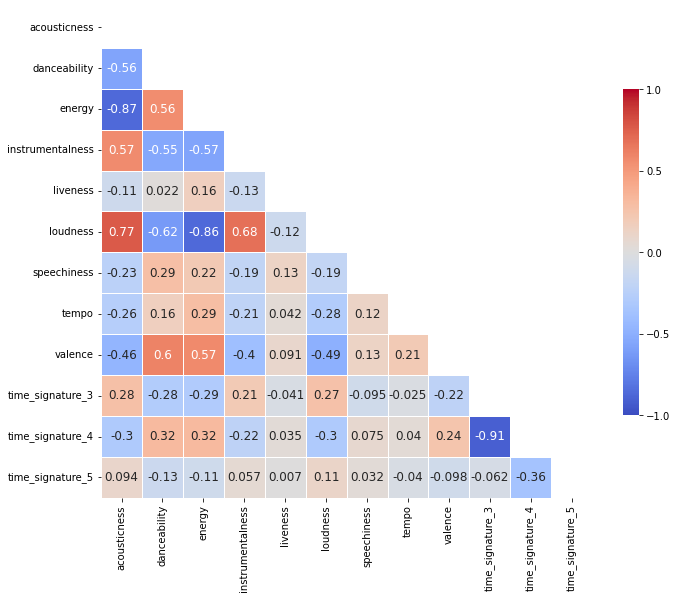

In [15]:
corr_heatmap(X_train)

In [16]:
# Currently the ‘multinomial’ option is supported only by the ‘lbfgs’, ‘sag’, ‘saga’ and ‘newton-cg’ solvers.
# http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression
param_grid = [    
    {'penalty' : ['l2', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg', 'sag', 'saga'],
    'max_iter' : [100, 1000,2500, 5000]
    }
]

In [17]:
#from sklearn.model_selection import GridSearchCV
#clf = GridSearchCV(LogisticRegression(multi_class = 'multinomial'), param_grid = param_grid, verbose=10, n_jobs=-1, error_score="raise")
#best_clf = clf.fit(X_train, y_train)

In [18]:
#print(best_clf.best_estimator_)
#print(best_clf.cv_results_)
#print (f'Accuracy - : {best_clf.score(X_train, y_train):.3f}')

In [19]:
# Thanks to GridSearch we know that the best choice is LogisticRegression(C=11.288378916846883, multi_class='multinomial',solver='newton-cg')
model = LogisticRegression(C=11.288378916846883, multi_class='multinomial',solver='newton-cg')
model.fit(X_train, y_train)

LogisticRegression(C=11.288378916846883, multi_class='multinomial',
                   solver='newton-cg')

In [20]:
y_pred = model.predict(X_valid)
from sklearn.metrics import classification_report
print(classification_report(y_valid, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.88      0.89      1434
           1       0.77      0.77      0.77      1513
           2       0.71      0.73      0.72      1524

    accuracy                           0.79      4471
   macro avg       0.80      0.79      0.80      4471
weighted avg       0.79      0.79      0.79      4471



In [21]:
X_train_loudness = X_train.drop(['loudness'], axis=1)
X_valid_loudness = X_valid.drop(['loudness'], axis=1)
lrm_cor = LogisticRegression(C=11.288378916846883, multi_class='multinomial',solver='newton-cg').fit(X_train_loudness, y_train)
print(classification_report(y_valid, lrm_cor.predict(X_valid_loudness)))

              precision    recall  f1-score   support

           0       0.88      0.87      0.87      1434
           1       0.75      0.74      0.74      1513
           2       0.68      0.70      0.69      1524

    accuracy                           0.77      4471
   macro avg       0.77      0.77      0.77      4471
weighted avg       0.77      0.77      0.77      4471



In [22]:
X_train_energy = X_train.drop(['energy'], axis=1)
X_valid_energy = X_valid.drop(['energy'], axis=1)
lrm_cor = LogisticRegression(C=11.288378916846883, multi_class='multinomial',solver='newton-cg').fit(X_train_energy, y_train)
print(classification_report(y_valid, lrm_cor.predict(X_valid_energy)))

              precision    recall  f1-score   support

           0       0.91      0.88      0.89      1434
           1       0.77      0.77      0.77      1513
           2       0.71      0.73      0.72      1524

    accuracy                           0.79      4471
   macro avg       0.80      0.79      0.80      4471
weighted avg       0.79      0.79      0.79      4471



In [23]:
X_train_acousticness = X_train.drop(['acousticness'], axis=1)
X_valid_acousticness = X_valid.drop(['acousticness'], axis=1)
lrm_cor = LogisticRegression(C=11.288378916846883, multi_class='multinomial',solver='newton-cg').fit(X_train_acousticness, y_train)
print(classification_report(y_valid, lrm_cor.predict(X_valid_acousticness)))

              precision    recall  f1-score   support

           0       0.91      0.87      0.89      1434
           1       0.77      0.77      0.77      1513
           2       0.71      0.73      0.72      1524

    accuracy                           0.79      4471
   macro avg       0.79      0.79      0.79      4471
weighted avg       0.79      0.79      0.79      4471



In [24]:
# The accuracy changes between 0.81 and 0.79 in every situation, I'm going to just keep those features
# I will now test the data with X_test and y_test
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.88      0.90      1885
           1       0.74      0.81      0.78      1821
           2       0.73      0.70      0.71      1882

    accuracy                           0.80      5588
   macro avg       0.80      0.80      0.80      5588
weighted avg       0.80      0.80      0.80      5588



In [25]:
# We see that the accuracy doesn't change much
# We'll now try to get best results with a Neural Network
from sklearn.neural_network import MLPClassifier

#mlp_gs = MLPClassifier()
parameter_space = {
    'hidden_layer_sizes': [(100, 100), (100, 100, 100), (100, 100, 100, 100)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd','adam'],
    'alpha': [0.0001, 0.001, 0.01, 0.1],
}
#from sklearn.model_selection import GridSearchCV
#from sklearn.metrics import classification_report
#clf = GridSearchCV(mlp_gs, parameter_space, n_jobs=-1, cv=5, scoring='accuracy', verbose=10, error_score="raise")
#clf.fit(X_train, y_train) # X is train samples and t is the corresponding labels

# best score achieved during the GridSearchCV
#print('GridSearch CV best score : {:.4f}\n\n'.format(clf.best_score_))

# print parameters that give the best results
#print('Parameters that give the best results :','\n\n', (clf.best_params_))

# print estimator that was chosen by the GridSearch
#print('\n\nEstimator that was chosen by the search :','\n\n', (clf.best_estimator_))

# %% [code]
# calculate GridSearch CV score on test set
#t_pred = clf.predict(X_valid)

#print('Model classification report with GridSearcg CV: \n', classification_report(y_valid, t_pred))

In [26]:
# With GridSearch we can see that the estimatore whioch gives the best result is
# MLPClassifier(activation='tanh', alpha=0.001, hidden_layer_sizes=(100, 100, 100, 100))
# I will now perform a second Grid Search with hyperparameters more similar to the ones just found
# and with early stopping in order to be more precise
# I will merge train and valid sets and test on the testing set
X_train = pd.concat([X_train, X_valid])
y_train = pd.concat([y_train, y_valid])
X_train, y_train = shuffle(X_train, y_train)
parameter_space = {
    'hidden_layer_sizes': [(100, 100, 100, 100), (100, 150, 200, 250), (100, 200, 300, 400)],
    'activation': ['tanh'],
    'solver': ['adam'],
    'alpha': [0.0001, 0.0002, 0.0004, 0.0008],
    'early_stopping': [True, False]
}
#from sklearn.model_selection import GridSearchCV
#from sklearn.metrics import classification_report
#clf = GridSearchCV(mlp_gs, parameter_space, n_jobs=-1, cv=5, scoring='accuracy', verbose=10, error_score="raise")
#clf.fit(X_train, y_train) # X is train samples and t is the corresponding labels

# best score achieved during the GridSearchCV
#print('GridSearch CV best score : {:.4f}\n\n'.format(clf.best_score_))

# print parameters that give the best results
#print('Parameters that give the best results :','\n\n', (clf.best_params_))

# print estimator that was chosen by the GridSearch
#print('\n\nEstimator that was chosen by the search :','\n\n', (clf.best_estimator_))

# %% [code]
# calculate GridSearch CV score on test set
#t_pred = clf.predict(X_test)

#print('Model classification report with GridSearcg CV: \n', classification_report(y_test, t_pred))

In [27]:
# Thanks to GridSearch we know that the best choice is MLPClassifier(activation='tanh', alpha=0.0008, hidden_layer_sizes=(100, 150, 200, 250)).fit(X_train, y_train)
clf = MLPClassifier(activation='tanh', alpha=0.0008, hidden_layer_sizes=(100, 150, 200, 250), max_iter = 500).fit(X_train, y_train)
y_pred=clf.predict(X_train)

In [28]:
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.90      0.91      1885
           1       0.72      0.77      0.74      1821
           2       0.70      0.66      0.68      1882

    accuracy                           0.78      5588
   macro avg       0.78      0.78      0.78      5588
weighted avg       0.78      0.78      0.78      5588

